In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
import numpy as np

In [4]:
# import pandas as pd
# import matplotlib as plt
# import nltk
# import sklearn

In [5]:

# print('The nltk version is {}.'.format(nltk.__version__))
# print('The scikit-learn version is {}.'.format(sklearn.__version__))
# print('The pandas version is {}.'.format(pd.__version__))
# print('The matplotlib version is {}.'.format(plt.__version__))

# Preparing processing

In [6]:
def cleaning(df):
    def label_encoder(df,col_name):
        le_encoders = {}
        le = LabelEncoder()
#     le_encoders[col_name] = le
        df[col_name] = le.fit_transform(df[col_name])
        return df

    def onehot_encoder(df,col_name):
        enc_df = df.copy()
        encoder = OneHotEncoder()
        encoded = encoder.fit_transform(
                df[col_name].values.reshape(-1, 1)).toarray()
        enc_df = pd.concat([
                enc_df, 
                pd.DataFrame(
                    encoded,
                    columns=[f'{col_name}_{cat}' for cat in encoder.categories_[0]])],
                axis=1)
        enc_df = enc_df.drop(col_name, axis=1)
        return enc_df

    def check_null_each_column(df):
        count = 0
        null_column = []
        for col in df:
            if(df[col].isnull().sum()!=0):
                print(col + "have null ->" + str(df[col].isnull().sum()))
                count+=1
                null_column.append(col)
        print("  Column which have null have " + str(count))
        return null_column
    
    def cvtRatingToNumeric(df,colname):
        df[colname].fillna(0,inplace = True)
        df[colname] = df[colname].replace(['Ex','Gd','TA','Fa','Po'], [5, 4, 3, 2, 1])
        #Creted by Sidekoiii
        df[colname] = df[colname].astype(int)
        return df
    
    def cvtRatingToNumeric2(df,column):
        df[column].fillna(0,inplace = True)
        df[column] = df[column].replace(['Gd','Av','Mn','No'], [4, 3, 2, 1])
        #Creted by Sidekoiii
        return df
    
    def cvtRatingToNumeric3(df,colname):
        df[colname].fillna(0,inplace = True)
        df[colname] = df[colname].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf'], [6,5, 4, 3, 2, 1])
        #Creted by Sidekoiii
        return df
    
    def cvtRatingToNumeric4(df,colname):
        df[colname].fillna(0,inplace = True)
        df[colname] = df[colname].replace(['GdPrv','MnPrv','GdWo','MnWw'], [4, 3, 2, 1])
        #Creted by Sidekoiii
        return df
    
    
    
#     LotFrontage
    temp_df = df[df['isTrain'] == True]
    temp_Lot = temp_df['LotFrontage'].dropna()
    df['LotFrontage'] = df['LotFrontage'].fillna(float(int(temp_Lot.mean())))
    
#     MSZoning
    temp_name_column = "MSZoning"
    df['MSZoning'] = df['MSZoning'].fillna("None")
    df = label_encoder(df,temp_name_column)
    
    
#     Street
    temp_column = 'Street'
    df = onehot_encoder(df,temp_column)
    
#     Alley
    df['Alley'].fillna("No alley access", inplace = True) 
    temp_col = "Alley"
    df = onehot_encoder(df,temp_col)
    
#     Lot Shape
    df['LotShape'] = df['LotShape'].fillna(-10)
    df['LotShape'] = df['LotShape'].replace("IR1",1)
    df['LotShape'] = df['LotShape'].replace("IR2",2)
    df['LotShape'] = df['LotShape'].replace("IR3",3)
    df['LotShape'] = df['LotShape'].replace("Reg",0)
    
#     LandContour
    df['LandContour'] = df['LandContour'].fillna(-10)
    df['LandContour'] = df['LandContour'].replace("Lvl",0)
    df['LandContour'] = df['LandContour'].replace("Bnk",1)
    df['LandContour'] = df['LandContour'].replace("HLS",2)
    df['LandContour'] = df['LandContour'].replace("Low",3)
    
#     Utilities
    df['Utilities'] = df['Utilities'].fillna("Unk")
    temp_col = "Utilities"
    df = label_encoder(df,temp_col)
    
#     LotConfig
    df['LotConfig'] = df['LotConfig'].fillna('Unk')
    temp_col = 'LotConfig'
    df = onehot_encoder(df,temp_col)
    
#     LandSlope
    df['LandSlope'] = df['LandSlope'].fillna(3)
    df['LandSlope'] = df['LandSlope'].replace("Gtl",0)
    df['LandSlope'] = df['LandSlope'].replace("Mod",1)
    df['LandSlope'] = df['LandSlope'].replace("Sev",2)
    
#     Neighborhood
    df['Neighborhood'] = df['Neighborhood'].fillna('Unk')
    temp_col = 'Neighborhood'
    df = onehot_encoder(df, temp_col)
    
#     Condition1
    df['Condition1'] = df['Condition1'].fillna(0)
    df["Condition1"] = df["Condition1"].replace(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
           'RRNe'], [5,7,2,9,8,3,6,1,4])
    
#     condition2
    df['Condition2'] = df['Condition2'].fillna('Unk')
    temp_col = "Condition2"
    df = label_encoder(df,temp_col)
    
#     BldgType
    df['BldgType'] = df['BldgType'].fillna('Unk')
    temp_col = "BldgType"
    df = onehot_encoder(df, temp_col)
    
#     HouseStyle
    df['HouseStyle'] = df['HouseStyle'].fillna('Unk')
    temp_col = "HouseStyle"
    df = label_encoder(df,temp_col)
    
#     OverallQual,OverallCond,yearBuilt,yearremodAdd -> numeric

#     RoofStyle
    df['RoofStyle'] = df['RoofStyle'].fillna('Unk')
    temp_col = "RoofStyle"
    df = label_encoder(df,temp_col)
    
#     RoofMatl
    df['RoofMatl'] = df['RoofMatl'].fillna('Unk')
    temp_col = "RoofMatl"
    df = label_encoder(df,temp_col)
    
    def rapunzelMagic(df):
        exteriorType = {'AsbShng','AsphShn','BrkComm','BrkFace','CBlock','HdBoard','ImStucc',
                    'MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing','Unk'}
        count_row = df.shape[0]
        for exteriorName in exteriorType:
            df['Exterior_' + exteriorName] = 0
        for i in range(0,count_row):
            for exteriorName in exteriorType:
                if(np.logical_or(df.loc[i,'Exterior1st'] == exteriorName, df.loc[i,'Exterior2nd'] == exteriorName)):
                    df.loc[i,'Exterior_'+ exteriorName] = 1
        df = df.drop(columns = ['Exterior1st','Exterior2nd'])
        return df
    
#     Exterior1st,Exterior2nd
    df['Exterior1st'] = df['Exterior1st'].fillna('Unk')
    df['Exterior2nd'] = df['Exterior2nd'].fillna('Unk')
    df = rapunzelMagic(df)    

        
#     MasVnrType
    df['MasVnrType'] = df['MasVnrType'].fillna("None")
    temp_col = 'MasVnrType'
    df = label_encoder(df,temp_col)
    
#     MasVnrArea
    temp_df = df[df['isTrain'] == True]
    temp = temp_df['MasVnrArea'].dropna()
    df['MasVnrArea'] = df['MasVnrArea'].fillna(float(int(temp.mean())))
    
#     ExterQual
    temp_col = 'ExterQual'
    df = cvtRatingToNumeric(df,'ExterQual')
    
#     ExterCond
    df = cvtRatingToNumeric(df,'ExterCond')
    
#     Foundation
    df = label_encoder(df,'Foundation')
    
#     BsmtQual
    df = cvtRatingToNumeric(df,'BsmtQual')
    
#     BsmtCond
    df = cvtRatingToNumeric(df,'BsmtCond')
    
#     BsmtExposure
    df = cvtRatingToNumeric2(df,'BsmtExposure')
    
#     BsmtFinType1
    df =cvtRatingToNumeric3(df,'BsmtFinType1')
    
#     BsmtFinSF1 -> numeric
    temp_df = df[df['isTrain'] == True]
    temp = df['BsmtFinSF1'].dropna()
    df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(float(int(temp.mean())))

#     BsmtFinType2
    df = cvtRatingToNumeric3(df,'BsmtFinType2')
    
#     BsmtFinSF2,BsmtUnfSF,TotalBsmtSf -> numeric
    
#     TotalBsmtSf
    temp_df = df[df['isTrain'] == True]
    temp = df['TotalBsmtSF'].dropna()
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(int(temp.mean()))


    
#     BsmtFinSF2
    temp_df = df[df['isTrain'] == True]
    temp = df['BsmtFinSF2'].dropna()
    df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(float(int(temp.mean())))

#     BsmtUnfSF
    temp_df = df[df['isTrain'] == True]
    temp = df['BsmtUnfSF'].dropna()
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(float(int(temp.mean())))
    
#     Heating
    df = label_encoder(df,'Heating')
    
#     HeatingQC
    df = cvtRatingToNumeric(df,'HeatingQC')
    
#     CentalAir
    df = label_encoder(df,'CentralAir')
    
#     Electrical
    df['Electrical'] = df['Electrical'].fillna("dontknow")
    df = label_encoder(df,'Electrical')
    
#     1stFlrSf,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomadvGr,KitchenAbvGr,->numeric

#     BsmtFullBath->numeric
    temp = df[df['isTrain'] == True]
    temp = temp['BsmtFullBath'].dropna()
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(float(int(temp.mean())))

#     BsmtHalfBath->numeric
    temp = df[df['isTrain'] == True]
    temp = temp['BsmtHalfBath'].dropna()
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(float(int(temp.mean())))

#     KitchenQual
    df = cvtRatingToNumeric(df,'KitchenQual')
    
#     TotRmsAbvGrd -> numeric

#     Functional
    df['Functional'] = df['Functional'].fillna("None")
    df = label_encoder(df,'Functional')
    
#     Fireplace ->numeric

#     FireplaceQU
    df = cvtRatingToNumeric(df,'FireplaceQu')
    
#     GarageType
    df['GarageType'].fillna("No garage", inplace = True)
    df = label_encoder(df,'GarageType')
    
#     GarageYrBlt
    df = df.drop(columns=['GarageYrBlt'])
    
#     GarageFinish
    df['GarageFinish']=df['GarageFinish'].fillna("No garage")
    df = label_encoder(df,'GarageFinish')
    
#     GarageCar->numeirc
    temp = df[df['isTrain'] == True]
    temp = temp['GarageCars'].dropna()
    df['GarageCars'] = df['GarageCars'].fillna(int(temp.mean()))
#     GarageArea->numeirc
    temp = df[df['isTrain'] == True]
    temp['GarageArea'] = temp['GarageArea'].dropna()
    df['GarageArea'] = df['GarageArea'].fillna(int(temp['GarageArea'].mean()))

#     GarageQual
    df = cvtRatingToNumeric(df,'GarageQual')
    
#     GarageCond
    df = cvtRatingToNumeric(df,'GarageCond')
    
#     PavedDrive
    df = label_encoder(df,'PavedDrive')
    
#     WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,

#     PoolQC
    df = cvtRatingToNumeric(df,'PoolQC')
    
#     Fence
    df = cvtRatingToNumeric4(df,'Fence')
    
#     MiscFeature
    df['MiscFeature'] = df['MiscFeature'].fillna('None')
    df = label_encoder(df,'MiscFeature')
    
#     MiscVal,MoSold,YrSold -> numeric

#     SaleType
    df['SaleType'] = df['SaleType'].fillna("None")
    df = label_encoder(df,'SaleType')
    
#     salecondition
    df = label_encoder(df,'SaleCondition')
    return df
    
    
    
    
    
    

In [7]:
def check_null_each_column(df):
    count = 0
    null_column = []
    for col in df:
        if(df[col].isnull().sum()!=0):
            print(col + " have null ->" + str(df[col].isnull().sum()))
            count+=1
            null_column.append(col)
    print("  Column which have null have " + str(count))
    return null_column

In [8]:
def mergeDataSet(train,test):
    train['isTrain'] = True
    test['isTrain'] = False
    test['SalePrice'] = 0
#     combined = pd.concat([train,test],sort=False)
    combined = train.append(test, ignore_index = True)
    return combined

In [9]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
df = mergeDataSet(df_train,df_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [12]:
df = mergeDataSet(df_train,df_test)
df.tail()
# df['SalePrice'].tail()
df = cleaning(df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
check_null_each_column(df)

  Column which have null have 0


[]

In [14]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,Exterior_Stucco,Exterior_WdShing,Exterior_Plywood,Exterior_AsphShn,Exterior_ImStucc,Exterior_VinylSd,Exterior_AsbShng,Exterior_Unk,Exterior_BrkFace,Exterior_BrkComm
0,856,854,0,3,3,1,706.0,0.0,6,1,...,0,0,0,0,0,1,0,0,0,0
1,1262,0,0,3,3,4,978.0,0.0,5,1,...,0,0,0,0,0,0,0,0,0,0
2,920,866,0,3,3,2,486.0,0.0,6,1,...,0,0,0,0,0,1,0,0,0,0
3,961,756,0,3,4,1,216.0,0.0,5,1,...,0,0,0,0,0,0,0,0,0,0
4,1145,1053,0,4,3,3,655.0,0.0,6,1,...,0,0,0,0,0,1,0,0,0,0


# Visualize

# Feature Selection

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [16]:
X = df_train.drop(['SalePrice','isTrain'], axis=1)
Y = df_train.SalePrice

In [17]:
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(X,Y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features

# Model

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
df_train = df[df['isTrain'] == True]
df_test = df[df['isTrain'] == False]

In [21]:
df_train.to_csv('df_train_already_clean.csv')

In [22]:
X = df_train.drop(['SalePrice','isTrain'], axis=1)
Y = df_train.SalePrice

X_train, X_rest, Y_train, Y_rest = train_test_split(
    X, Y, test_size=0.20)
X_valid, X_test, Y_valid, Y_test = train_test_split(
    X_rest, Y_rest, test_size=0.50)

In [23]:
lr = HuberRegressor().fit(X_train, Y_train)

In [24]:
Y_train_pred = lr.predict(X_train)
Y_valid_pred = lr.predict(X_valid)
Y_test_pred = lr.predict(X_test)

In [25]:
print('train: ', mean_squared_error(Y_train, Y_train_pred))
print('valid: ', mean_squared_error(Y_valid, Y_valid_pred))
print('test: ', mean_squared_error(Y_test, Y_test_pred))

train:  1974833974.6757035
valid:  2023505419.9583528
test:  1234922749.674117


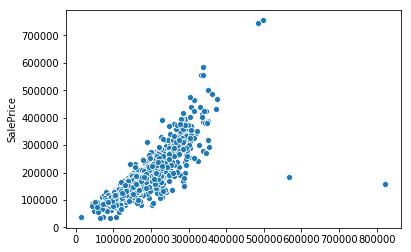

In [26]:
sns.scatterplot(x=Y_train_pred, y=Y_train)

# Special Algorithm

In [27]:
#  use df_train, drop saleprice+istrain

In [28]:
df_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,Exterior_Stucco,Exterior_WdShing,Exterior_Plywood,Exterior_AsphShn,Exterior_ImStucc,Exterior_VinylSd,Exterior_AsbShng,Exterior_Unk,Exterior_BrkFace,Exterior_BrkComm
0,856,854,0,3,3,1,706.0,0.0,6,1,...,0,0,0,0,0,1,0,0,0,0
1,1262,0,0,3,3,4,978.0,0.0,5,1,...,0,0,0,0,0,0,0,0,0,0
2,920,866,0,3,3,2,486.0,0.0,6,1,...,0,0,0,0,0,1,0,0,0,0
3,961,756,0,3,4,1,216.0,0.0,5,1,...,0,0,0,0,0,0,0,0,0,0
4,1145,1053,0,4,3,3,655.0,0.0,6,1,...,0,0,0,0,0,1,0,0,0,0


In [29]:
X = df_train.drop(['SalePrice','isTrain'], axis=1)
Y = df_train.SalePrice

In [30]:
Columns = []
for col in X.columns:
    Columns.append(col)

In [32]:
# total_size = len(test_alg)
# print_list = []
# test_alg = ['A','B','C','D']
# def recursive(question_list,temp_str,number_iteration,print_list):
# #     print("Start Recursive")
#     if number_iteration == 2:
#         for index in question_list:
#             add_str = temp_str+index
#             if len(temp_str)>1:
#                 if temp_str[len(temp_str)-1] == index:
#                     print("Not Add")
#                 else:
#                     print_list.append(add_str)  
#             else:    
#                 print_list.append(add_str)   
#     else:
# #         print()
#         for temp_question in question_list:
#             new_temp_str = temp_str+temp_question
#             recursive(question_list[1:],new_temp_str,number_iteration-1,print_list)
# while len(test_alg) !=0:
#     first_index = test_alg[0]
#     print_list.append(first_index)
#     temp_list = test_alg[1:]
#     for iteration in range(1,len(test_alg)+1):
#         temp_str = first_index
# #         print_list.append(temp_str)
#         recursive(temp_list,temp_str,iteration,print_list)
    
#     test_alg.remove(first_index)
# mylist = list(dict.fromkeys(print_list))
# print(print_list)

In [33]:
df_train_alg = df_train.drop(['SalePrice','isTrain'], axis=1)

In [34]:
len(df_train_alg.columns)

129

In [35]:
for col in df_train_alg.columns:
    temp_col = col
type(temp_col)

str

In [36]:
col_list = []
for col in df_train_alg.columns:
    temp_array=[]
    temp_array.append(col)
    col_list.append(temp_array)

In [37]:
len(col_list)

129

In [38]:
col_list

[['1stFlrSF'],
 ['2ndFlrSF'],
 ['3SsnPorch'],
 ['BedroomAbvGr'],
 ['BsmtCond'],
 ['BsmtExposure'],
 ['BsmtFinSF1'],
 ['BsmtFinSF2'],
 ['BsmtFinType1'],
 ['BsmtFinType2'],
 ['BsmtFullBath'],
 ['BsmtHalfBath'],
 ['BsmtQual'],
 ['BsmtUnfSF'],
 ['CentralAir'],
 ['Condition1'],
 ['Condition2'],
 ['Electrical'],
 ['EnclosedPorch'],
 ['ExterCond'],
 ['ExterQual'],
 ['Fence'],
 ['FireplaceQu'],
 ['Fireplaces'],
 ['Foundation'],
 ['FullBath'],
 ['Functional'],
 ['GarageArea'],
 ['GarageCars'],
 ['GarageCond'],
 ['GarageFinish'],
 ['GarageQual'],
 ['GarageType'],
 ['GrLivArea'],
 ['HalfBath'],
 ['Heating'],
 ['HeatingQC'],
 ['HouseStyle'],
 ['Id'],
 ['KitchenAbvGr'],
 ['KitchenQual'],
 ['LandContour'],
 ['LandSlope'],
 ['LotArea'],
 ['LotFrontage'],
 ['LotShape'],
 ['LowQualFinSF'],
 ['MSSubClass'],
 ['MSZoning'],
 ['MasVnrArea'],
 ['MasVnrType'],
 ['MiscFeature'],
 ['MiscVal'],
 ['MoSold'],
 ['OpenPorchSF'],
 ['OverallCond'],
 ['OverallQual'],
 ['PavedDrive'],
 ['PoolArea'],
 ['PoolQC'],
 ['Roo

In [ ]:
def check_contain(loop_list,index):
    for i in loop_list:
        temp_i = []
        temp_i.append(i)
        if temp_i == index:
            return True
    return False
    

def recursive(question_list,temp_str,number_iteration,print_list):
#     print("Start Recursive")
    if number_iteration == 2:
        for index in question_list:
            add_str = temp_str+index
            if len(temp_str)>1:
#                 print(temp_str)
#                 print(index)
                
                if check_contain(temp_str,index) == True:
                    print('not add')
                else:
                    print_list.append(add_str)   
            else:    
                print_list.append(add_str)                   
    else:
        for temp_question in question_list:
            new_temp_str = temp_str+temp_question
            recursive(question_list[1:],new_temp_str,number_iteration-1,print_list)
print_list = []
while len(col_list) !=0:
    first_index = col_list[0]
    print_list.append(first_index)
    temp_list = col_list[1:]
    for iteration in range(1,len(col_list)+1):
        temp_str = first_index
#         print_list.append(temp_str)
        recursive(temp_list,temp_str,iteration,print_list)    
    col_list.remove(first_index)

In [ ]:
print_list

In [ ]:
x = df_train_alg[col_list[1:3]]

In [ ]:
x.head()

In [ ]:
a=['a']
b=['b']
ans = []
temp = a+b

In [ ]:
ans.append(temp)

In [ ]:
ans